### Inject Bugs & Run Experiment

![Inject Bugs & Run Experiment](./pic/RL_Testing.drawio.png)

In [6]:
import testing_SB3


# initialize bug_version_list; bug_version_list中的bug序号于bug_lib.py中的序号所代表的bug一致
bug_version_list = [
    # [0],
    # [1],
    # # ...,
    # [1,2,3]
    # [],
    [2],
    [0],
    [1],
    [3],
    [4],
    [],
]

testing_SB3.main(bug_version_list)
    

from typing import Any, ClassVar, Dict, Optional, Type, TypeVar, Union

import torch as th
from gymnasium import spaces
from torch.nn import functional as F

from stable_baselines3.common.buffers import RolloutBuffer
from stable_baselines3.common.on_policy_algorithm import OnPolicyAlgorithm
from stable_baselines3.common.policies import ActorCriticCnnPolicy, ActorCriticPolicy, BasePolicy, MultiInputActorCriticPolicy
from stable_baselines3.common.type_aliases import GymEnv, MaybeCallback, Schedule
from stable_baselines3.common.utils import explained_variance

SelfA2C = TypeVar("SelfA2C", bound="A2C")


class A2C(OnPolicyAlgorithm):
    """
    Advantage Actor Critic (A2C)

    Paper: https://arxiv.org/abs/1602.01783
    Code: This implementation borrows code from https://github.com/ikostrikov/pytorch-a2c-ppo-acktr-gail and
    and Stable Baselines (https://github.com/hill-a/stable-baselines)

    Introduction to A2C: https://hackernoon.com/intuitive-rl-intro-to-advantage-actor-critic-a2c

KeyboardInterrupt: 

### Validation Part

In [1]:
import log_parser
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\hkson\AppData\Local\Temp\ipykernel_103660\2624722933.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def linelar_regression(data, title = 'Data Trend Analysis'):
# data = [100, 102, 98, 97, 105, 110, 108, 112, 115, 118, 121, 125]
# data = result

    # 将数据转换成Pandas Series对象
    series = pd.Series(data)

    # 计算简单移动平均(SMA)和指数移动平均(EMA)
    sma = series.rolling(window=3).mean()
    ema = series.ewm(span=3, adjust=False).mean()

    # 使用线性回归判断趋势
    slope, intercept, r_value, p_value, std_err = linregress(range(len(data)), data)

    # 绘制数据和趋势线
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Original Data', marker='o')
    # plt.plot(sma, label='SMA 3-period', linestyle='--')
    # plt.plot(ema, label='EMA 3-period', linestyle='--')
    plt.plot(range(len(data)), intercept + slope * np.asarray(range(len(data))), 'r', label=f'Trend Line: slope={slope:.2f}')
    plt.legend()
    plt.title(title)
    plt.show()

    # 输出线性回归结果
    print(f"Slope of trend line: {slope:.2f}")
    print(f"R-squared: {r_value**2:.2f}")
    print(f"P-value of trend line: {p_value:.2f}")

    # 如果斜率显著大于0，我们可以认为存在上升趋势
    if p_value < 0.05 and slope > 0:
        print("The data shows a statistically significant increasing trend.")
        return 'rise'
    else:
        print("The data does not show a statistically significant increasing trend.")
        return 'false'

[WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_0'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_1'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_10'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_11'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_12'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_13'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_14'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_15'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_16'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_17'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_18'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_19'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-02-26[14]round_2'), WindowsPath('logs/archived_logs/a2c_bug14/time_2024-0

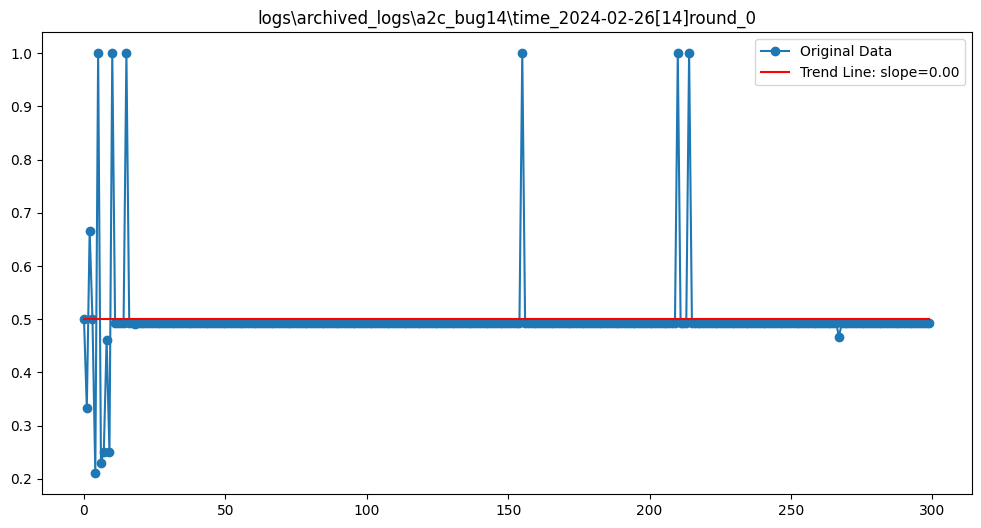

Slope of trend line: 0.00
R-squared: 0.00
P-value of trend line: 1.00
The data does not show a statistically significant increasing trend.


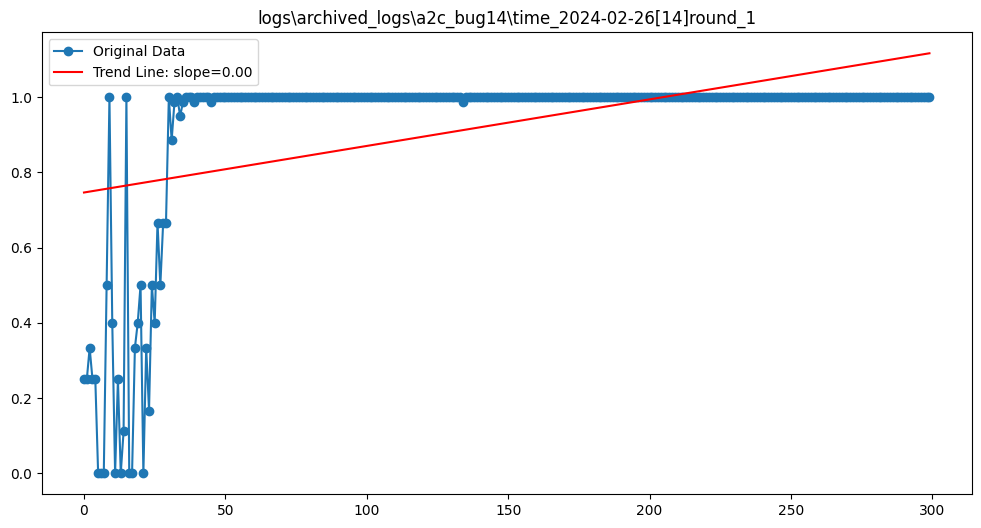

Slope of trend line: 0.00
R-squared: 0.24
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


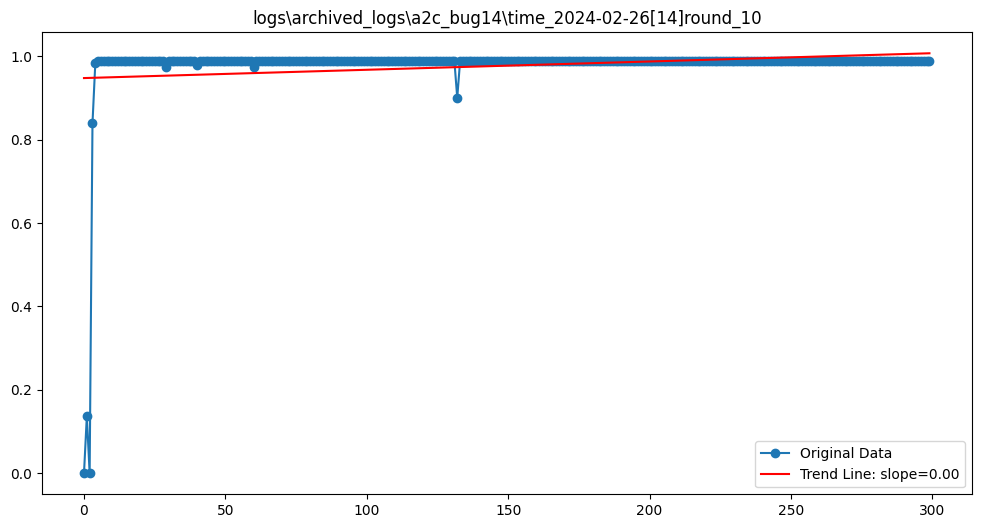

Slope of trend line: 0.00
R-squared: 0.03
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


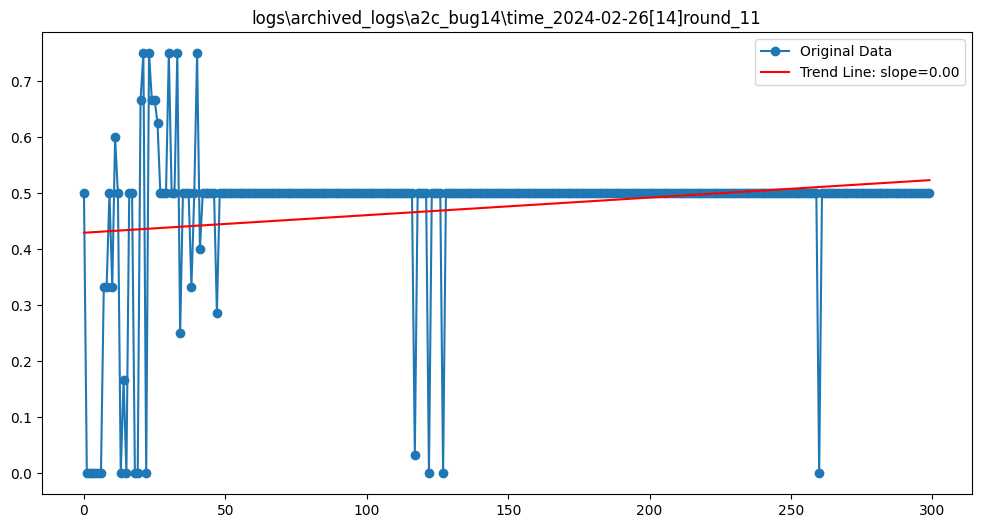

Slope of trend line: 0.00
R-squared: 0.05
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


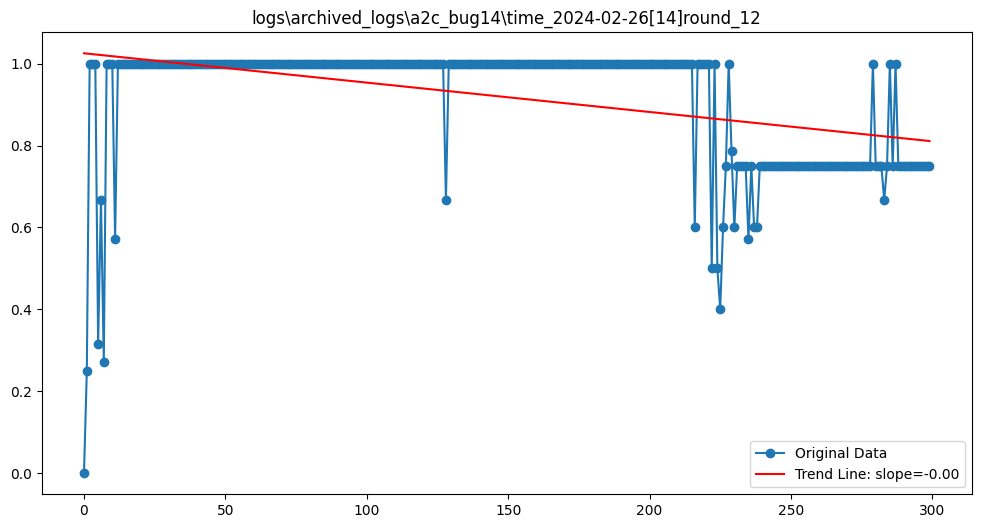

Slope of trend line: -0.00
R-squared: 0.17
P-value of trend line: 0.00
The data does not show a statistically significant increasing trend.


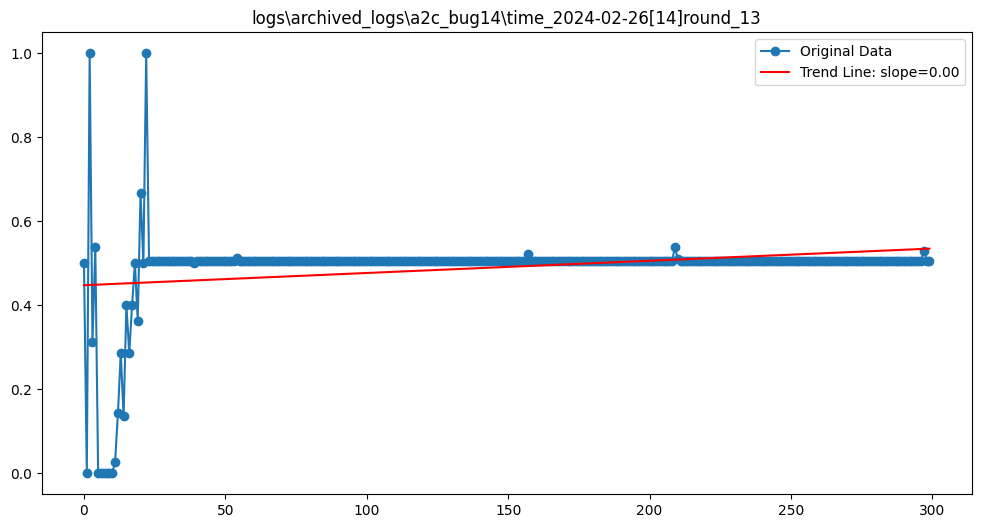

Slope of trend line: 0.00
R-squared: 0.07
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


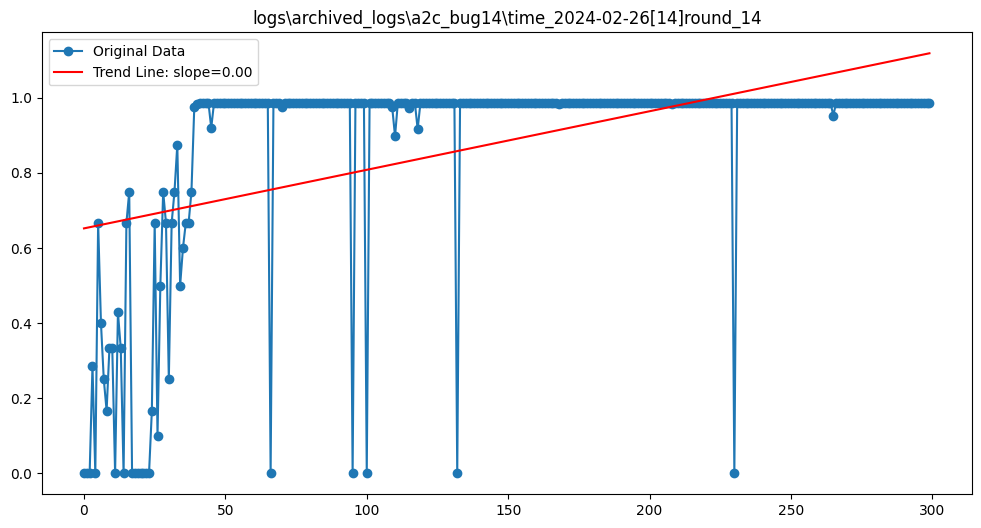

Slope of trend line: 0.00
R-squared: 0.25
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


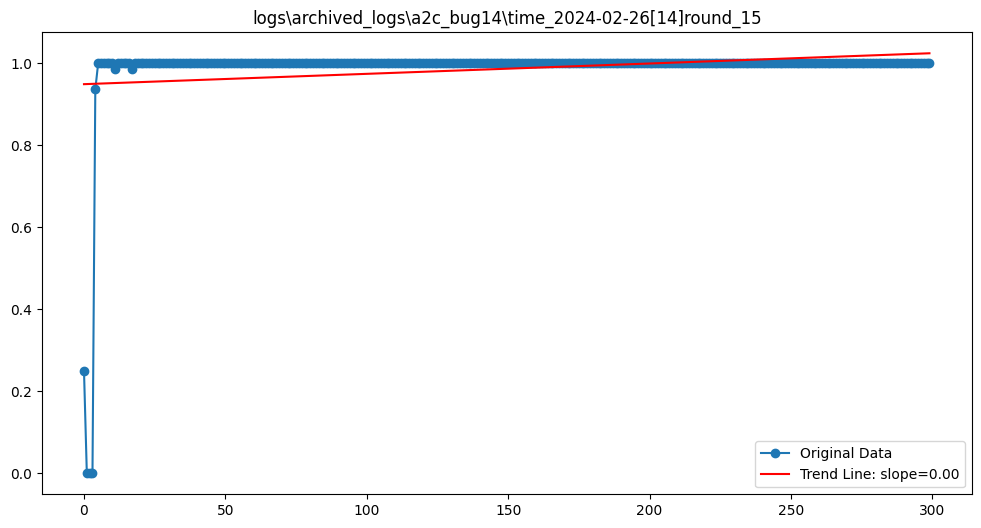

Slope of trend line: 0.00
R-squared: 0.04
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


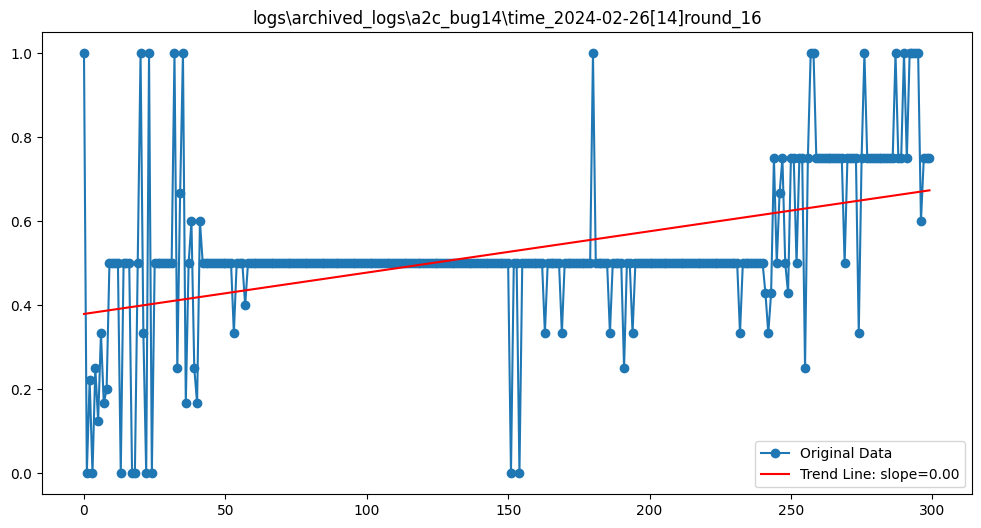

Slope of trend line: 0.00
R-squared: 0.23
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


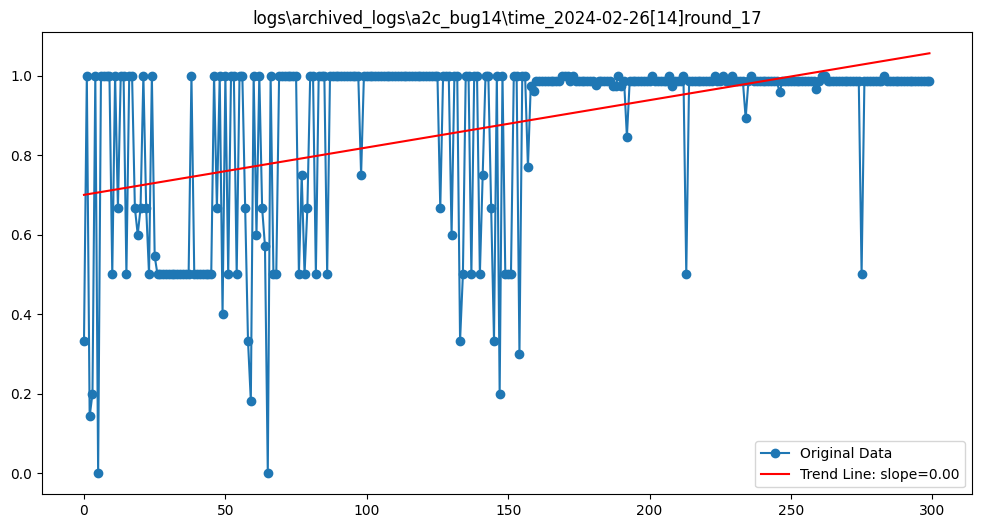

Slope of trend line: 0.00
R-squared: 0.22
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


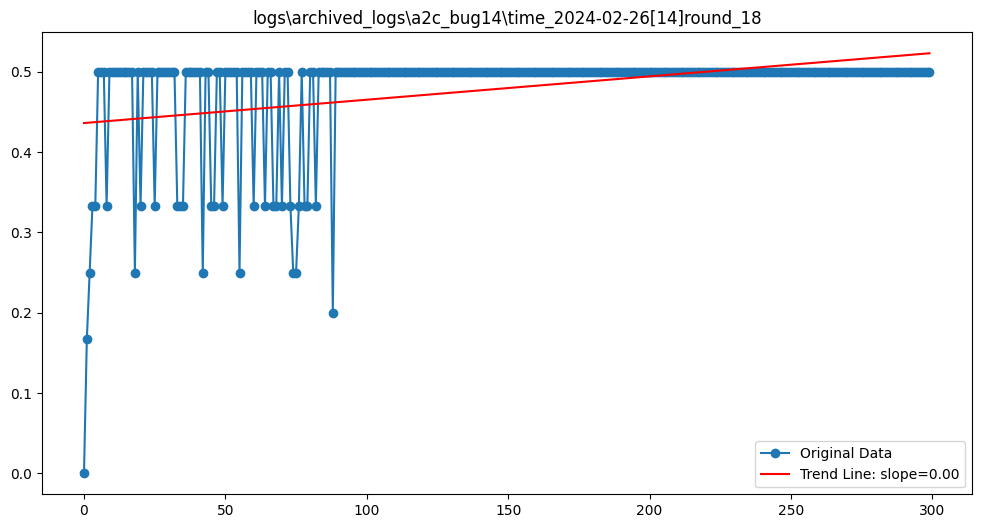

Slope of trend line: 0.00
R-squared: 0.15
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


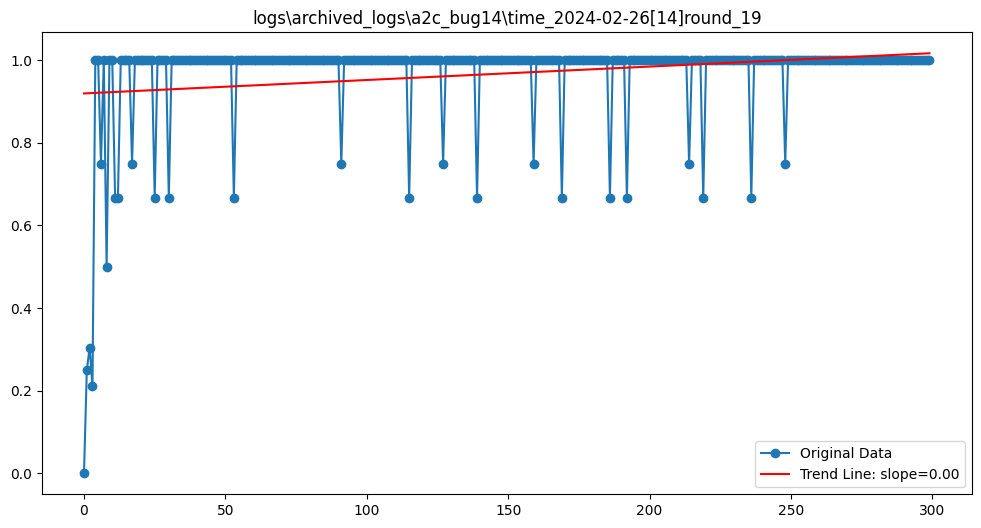

Slope of trend line: 0.00
R-squared: 0.05
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


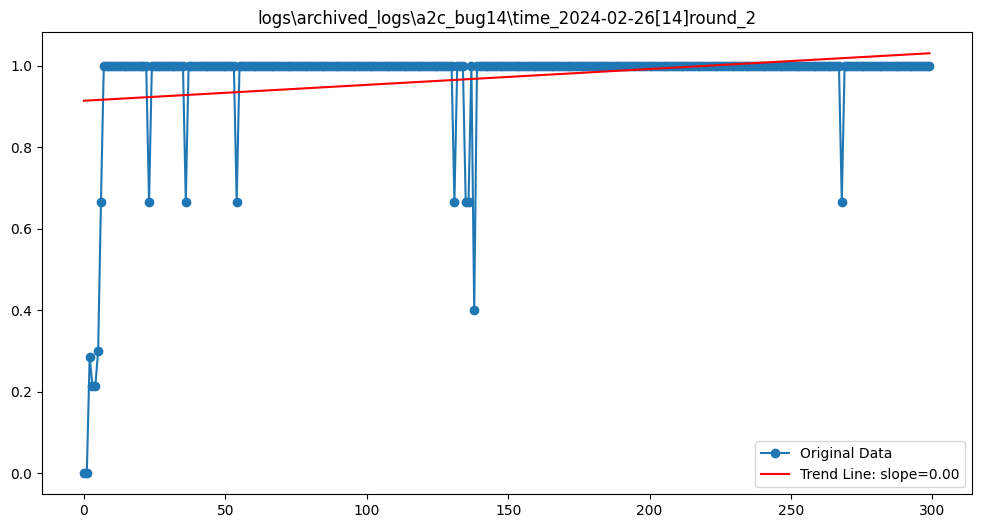

Slope of trend line: 0.00
R-squared: 0.06
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


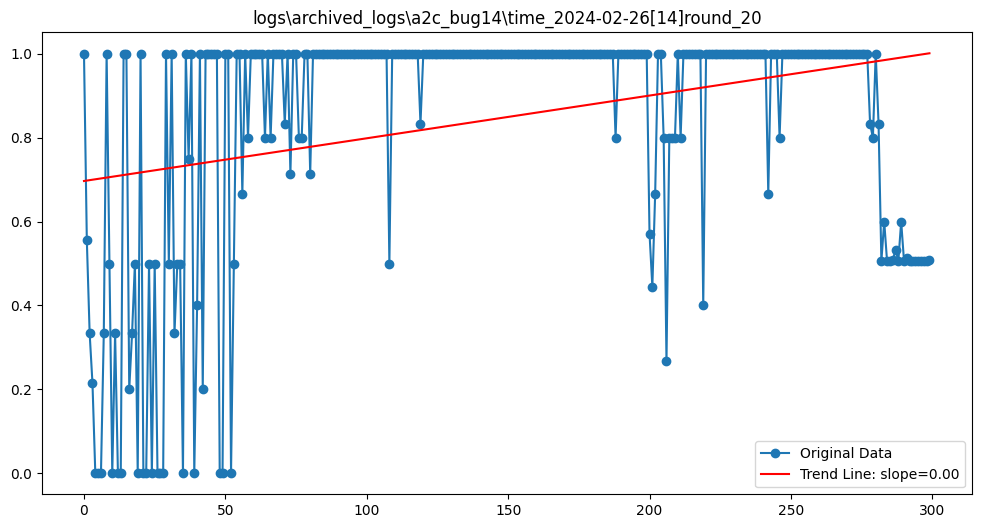

Slope of trend line: 0.00
R-squared: 0.09
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


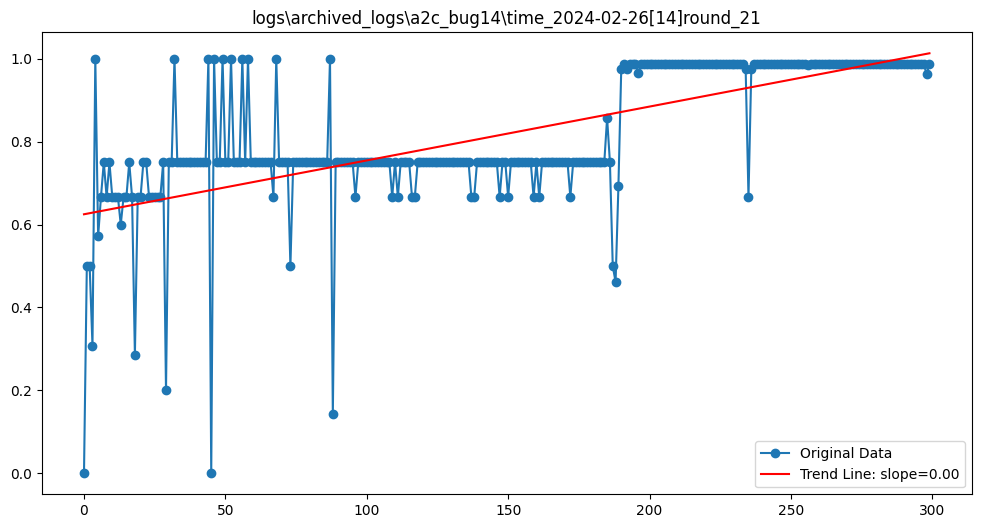

Slope of trend line: 0.00
R-squared: 0.47
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


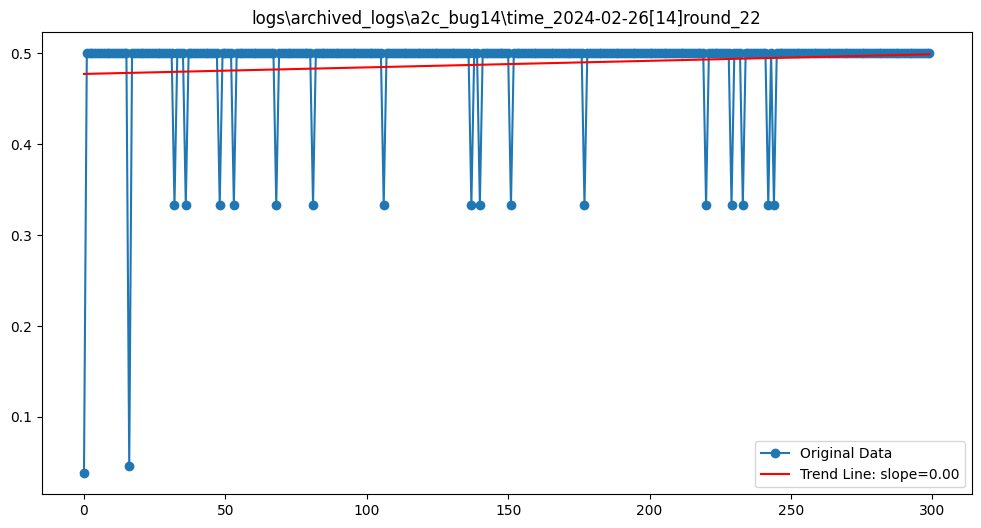

Slope of trend line: 0.00
R-squared: 0.01
P-value of trend line: 0.04
The data shows a statistically significant increasing trend.


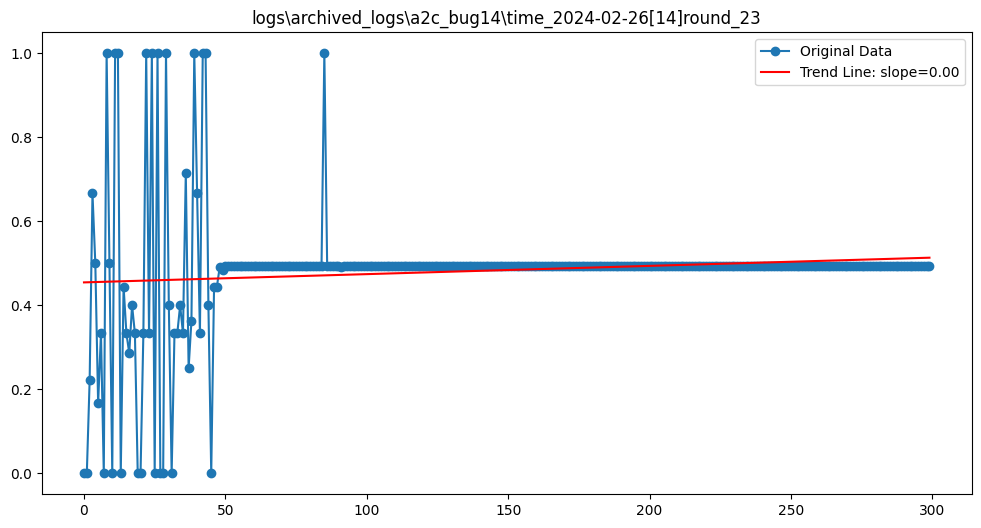

Slope of trend line: 0.00
R-squared: 0.01
P-value of trend line: 0.04
The data shows a statistically significant increasing trend.


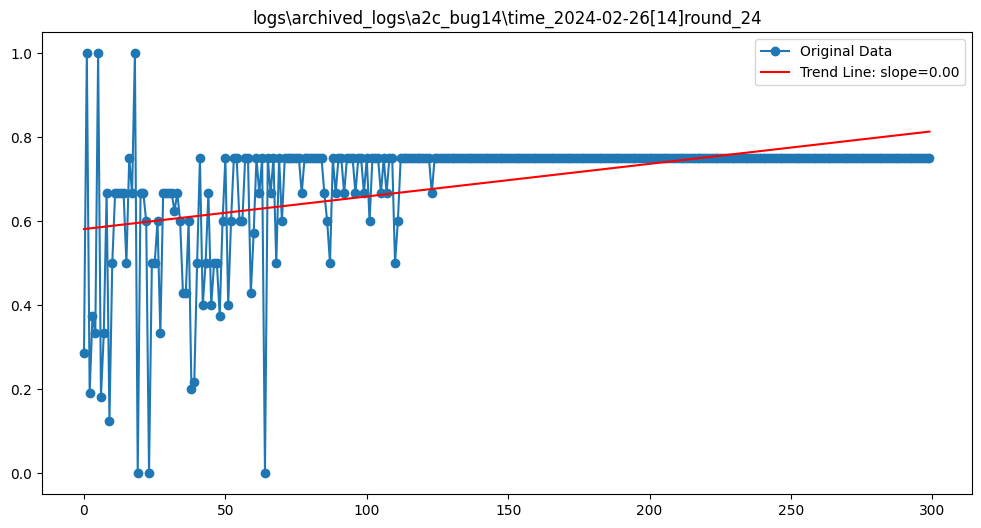

Slope of trend line: 0.00
R-squared: 0.25
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


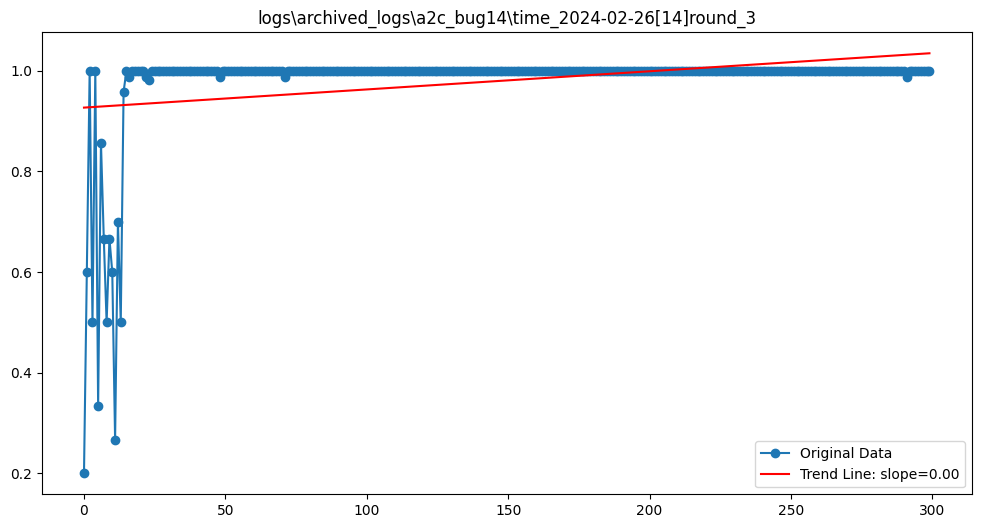

Slope of trend line: 0.00
R-squared: 0.10
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


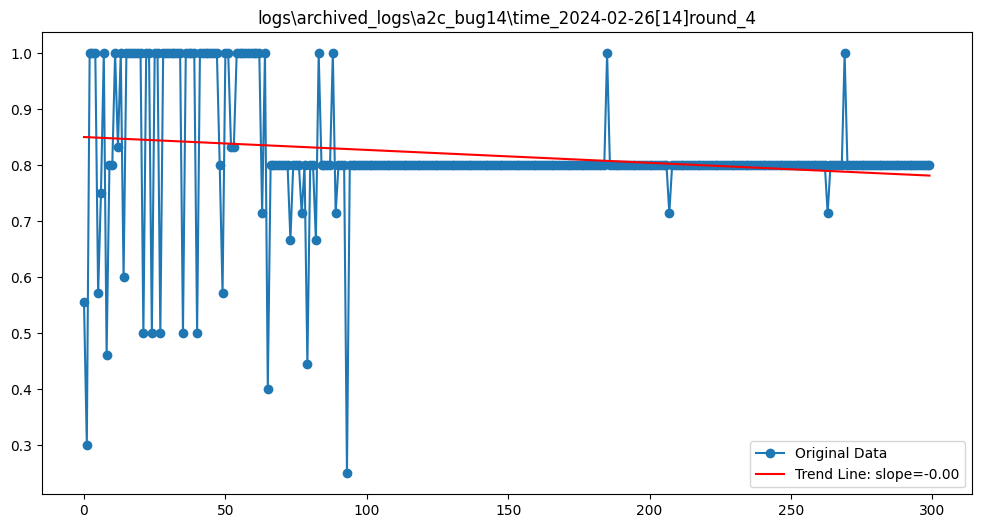

Slope of trend line: -0.00
R-squared: 0.03
P-value of trend line: 0.00
The data does not show a statistically significant increasing trend.


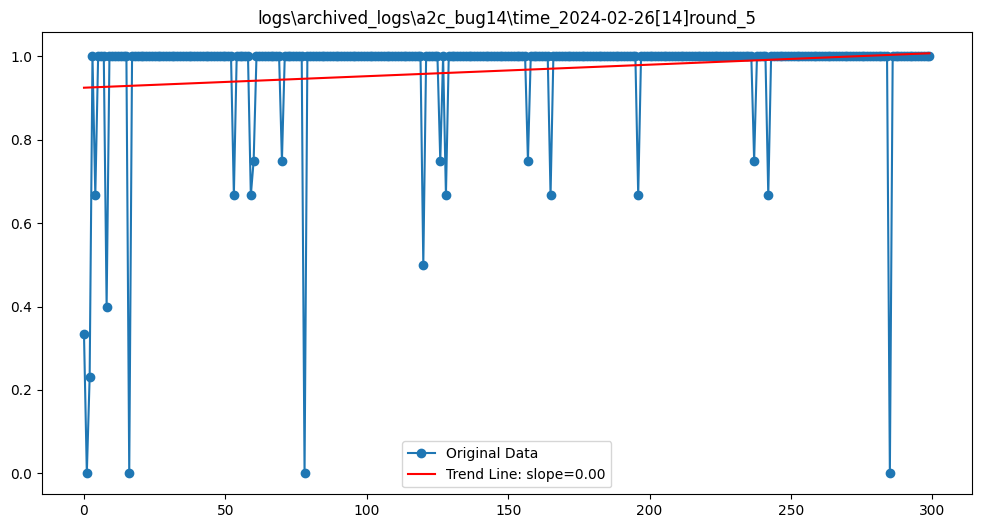

Slope of trend line: 0.00
R-squared: 0.03
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


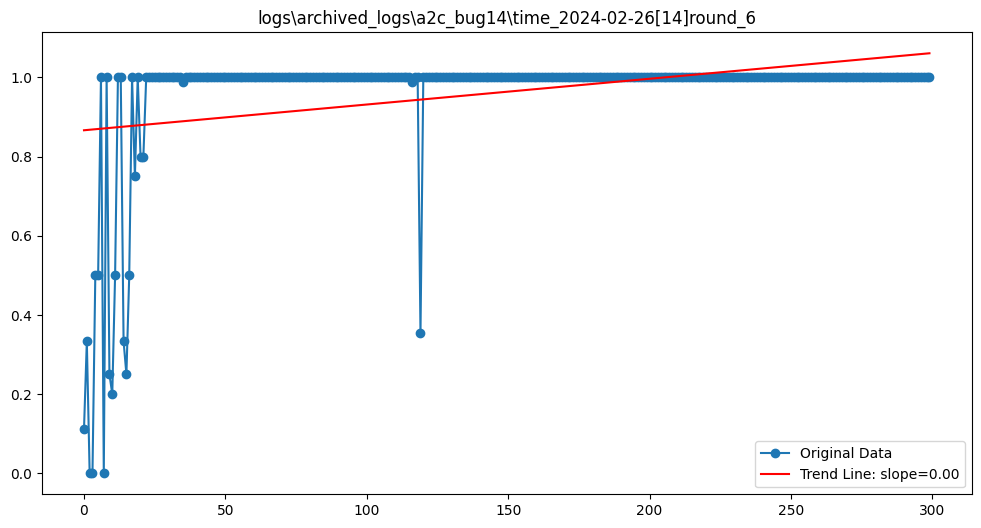

Slope of trend line: 0.00
R-squared: 0.13
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.


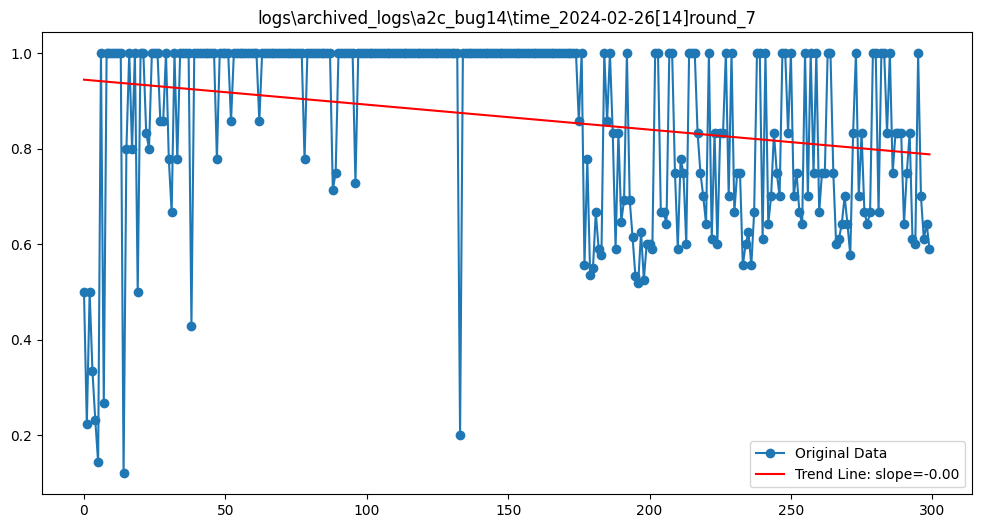

Slope of trend line: -0.00
R-squared: 0.06
P-value of trend line: 0.00
The data does not show a statistically significant increasing trend.


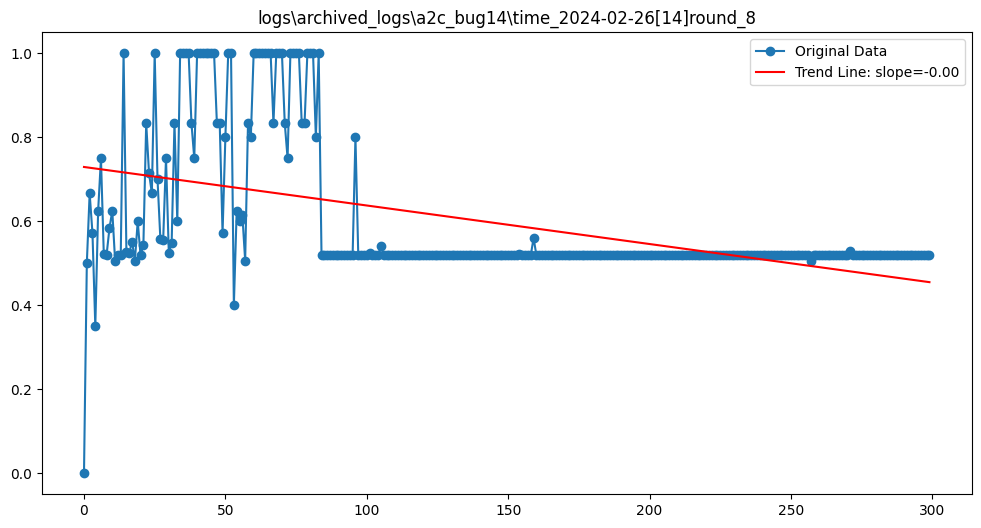

Slope of trend line: -0.00
R-squared: 0.24
P-value of trend line: 0.00
The data does not show a statistically significant increasing trend.


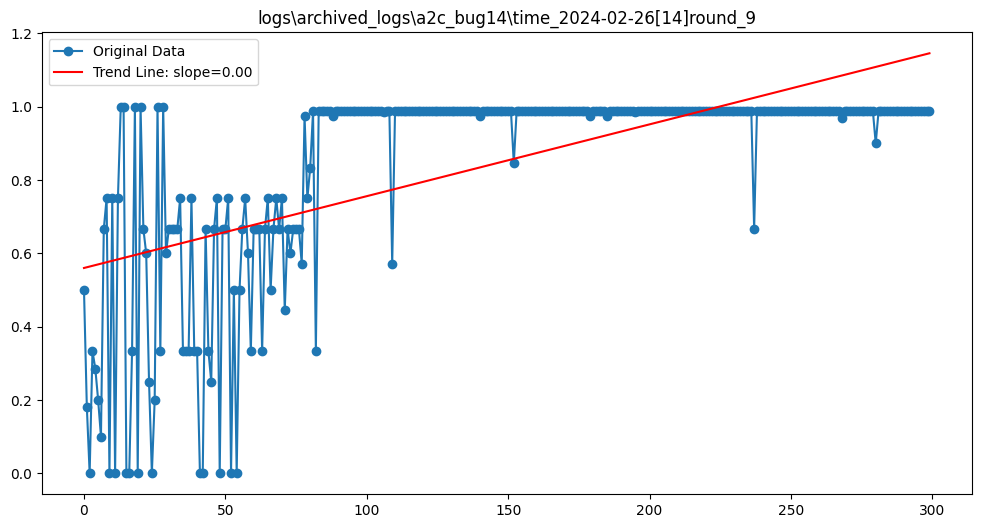

Slope of trend line: 0.00
R-squared: 0.41
P-value of trend line: 0.00
The data shows a statistically significant increasing trend.
['false', 'rise', 'rise', 'rise', 'false', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'false', 'rise', 'rise', 'false', 'false', 'rise']


In [3]:
from pathlib import Path


# bug_free_log_path = Path(os.path.join('logs', 'archived_logs', 'temp'))
bug_free_log_path = Path(os.path.join('logs', 'archived_logs', 'a2c_bug14'))

# 使用 Path.rglob() 获取所有子文件
# '**/*' 表示匹配所有的文件和文件夹, 如果只想匹配文件, 使用 '**/*.*'
bug_free_log_list = [file for file in bug_free_log_path.rglob('*') if file.is_file()]

print(bug_free_log_list)

# accuracy_list = []
# 打印所有文件路径
result = []
for path in bug_free_log_list:
    # print(log_parser.parse_log_file(path))
    temp = linelar_regression(log_parser.parse_log_file_new(path), title=path)
    result.append(temp)

print(result)

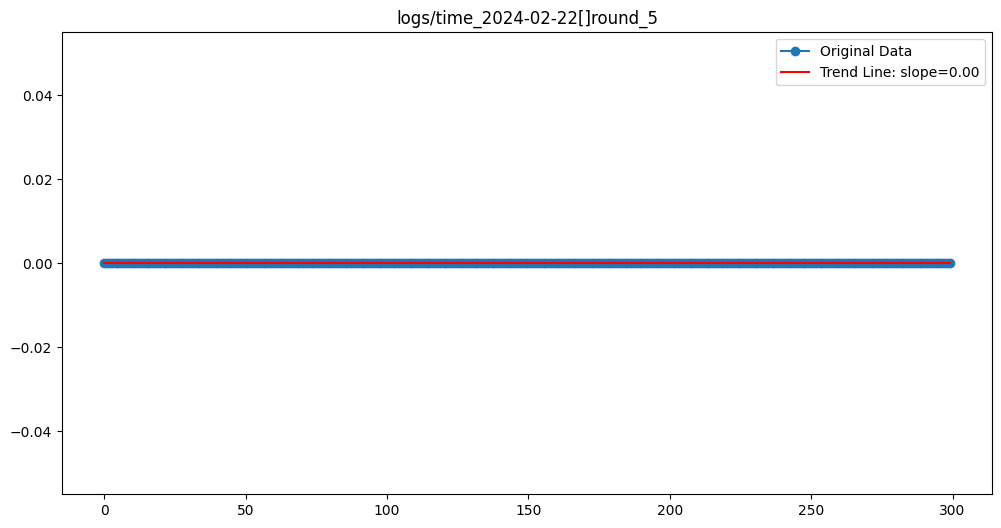

Slope of trend line: 0.00
R-squared: 0.00
P-value of trend line: 1.00
The data does not show a statistically significant increasing trend.


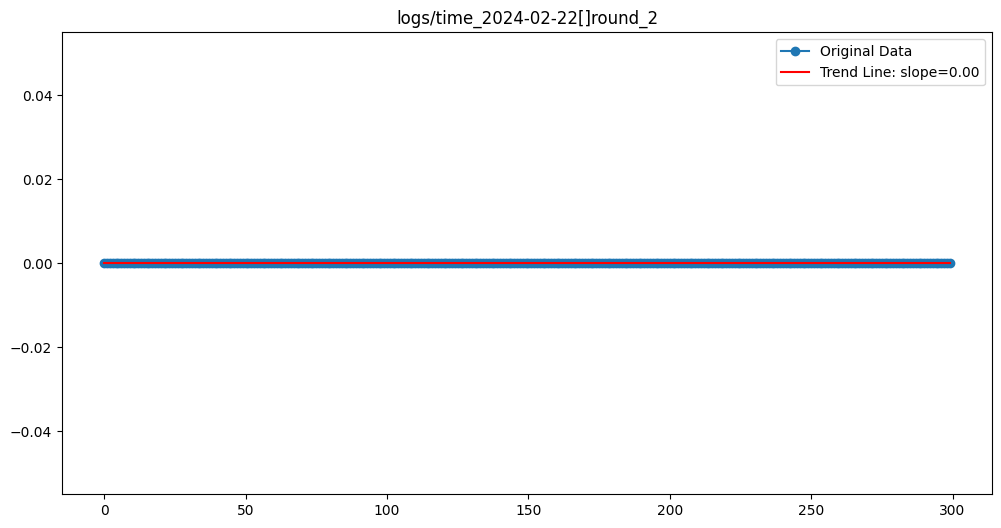

Slope of trend line: 0.00
R-squared: 0.00
P-value of trend line: 1.00
The data does not show a statistically significant increasing trend.


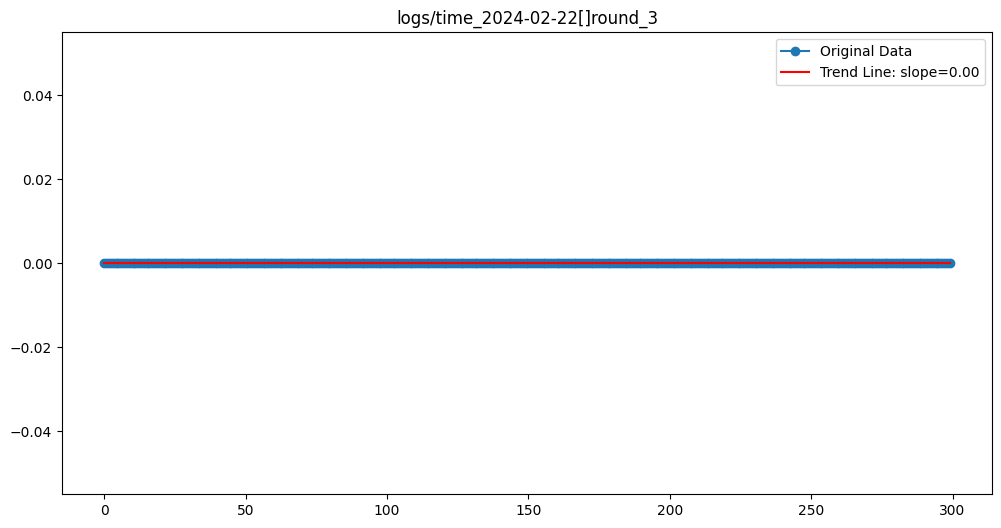

Slope of trend line: 0.00
R-squared: 0.00
P-value of trend line: 1.00
The data does not show a statistically significant increasing trend.


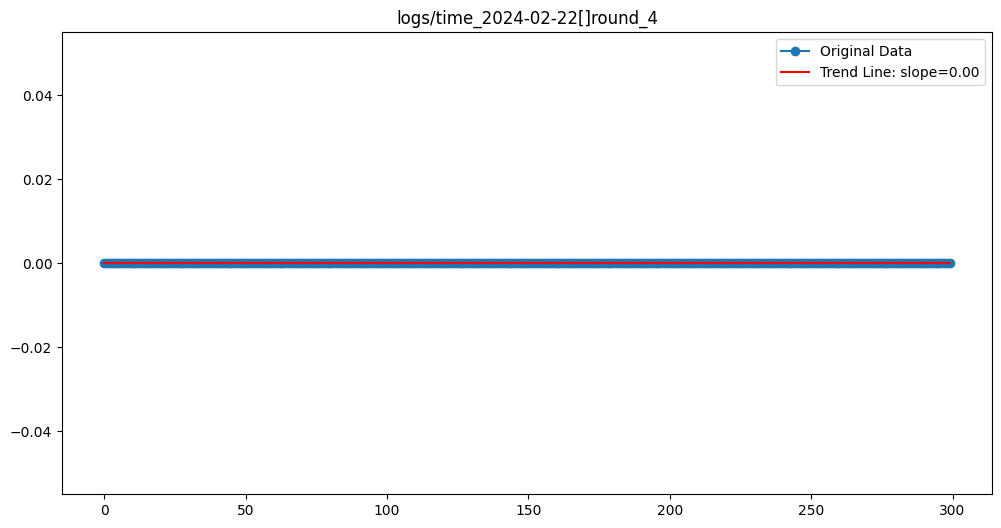

Slope of trend line: 0.00
R-squared: 0.00
P-value of trend line: 1.00
The data does not show a statistically significant increasing trend.


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xef in position 1085: invalid continuation byte

In [5]:
bug_free_log_path = Path(os.path.join('logs'))

# 使用 Path.rglob() 获取所有子文件
# '**/*' 表示匹配所有的文件和文件夹, 如果只想匹配文件, 使用 '**/*.*'
bug_free_log_list = [file for file in bug_free_log_path.rglob('*') if file.is_file()]

# print(bug_free_log_list)

# accuracy_list = []
# 打印所有文件路径
for path in bug_free_log_list:
    # print(log_parser.parse_log_file(path))
    linelar_regression(log_parser.parse_log_file(path), title=path)